Nathan Edwards

Data Science Final Project

NFL Big Data Bowl Competition

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
# read in data we need
players_data_1 = pd.read_csv('players.csv')

*******************************************************************************
*******************************************************************************
Predicting a Player's WEIGHT based on: HEIGHT, BIRTHDAY, COLLEGE, and POSITION

Linear Regression
*******************************************************************************
*******************************************************************************

In [4]:
# split data into training and testing data
players_train_1, players_test_1 = train_test_split(players_data_1, test_size=0.2)

#Show split
print(f'All of players data: {players_data_1.shape}')
print(f'Training players data: {players_train_1.shape}')
print(f'Test players data: {players_test_1.shape}')


All of players data: (1303, 7)
Training players data: (1042, 7)
Test players data: (261, 7)


In [5]:
players_train_1.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
1228,2561316,70,185,1996-02-02,Utah State,CB,Jalen Davis
557,2543492,68,185,1990-11-27,Florida State,FS,Lamarcus Joyner
923,2543823,70,191,1992-02-23,Missouri,CB,E.J. Gaines
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz
234,2559053,71,188,1995-04-10,Nevada-Las Vegas,CB,Torry McTyer


In [6]:
total_features_players_1 = pd.concat((players_train_1, players_test_1))
players_data_refined_1 = pd.concat([total_features_players_1.iloc[:, 1:2], total_features_players_1.iloc[:, 3:-1]], axis=1)
players_data_refined_1.head()


,height,birthDate,collegeName,position
1228,70,1996-02-02,Utah State,CB
557,68,1990-11-27,Florida State,FS
923,70,1992-02-23,Missouri,CB
9,77,1990-11-10,Stanford,TE
234,71,1995-04-10,Nevada-Las Vegas,CB


In [7]:
# separate numeric from categorical data
all_features_players_1 = players_data_refined_1.select_dtypes(exclude='number')

# after standardizing the data all means vanish, hence we can set missing values to 0

all_features_players_1 = all_features_players_1.fillna(0)
all_features_players_1.head()

,height,birthDate,collegeName,position
1228,70,1996-02-02,Utah State,CB
557,68,1990-11-27,Florida State,FS
923,70,1992-02-23,Missouri,CB
9,77,1990-11-10,Stanford,TE
234,71,1995-04-10,Nevada-Las Vegas,CB


In [8]:
# one hot encode all categorical data
all_features_players_1 = pd.get_dummies(all_features_players_1)
all_features_players_1.head()

,height_5-10,height_5-11,height_5-6,height_5-7,height_5-8,height_5-9,height_6-0,height_6-1,height_6-2,height_6-3,height_6-4,height_6-5,height_6-6,height_6-7,height_66,height_67,height_68,height_69,height_70,height_71,height_72,height_73,height_74,height_75,height_76,height_77,height_78,height_79,height_80,birthDate_01/02/1988,birthDate_01/03/1981,birthDate_01/03/1991,birthDate_01/04/1985,birthDate_01/06/1989,birthDate_01/07/1994,birthDate_01/08/1991,birthDate_01/10/1993,birthDate_01/13/1989,birthDate_01/14/1992,birthDate_01/15/1986,...,collegeName_Weber State,collegeName_West Alabama,collegeName_West Georgia,collegeName_West Virginia,collegeName_Western Carolina,collegeName_Western Kentucky,collegeName_Western Michigan,collegeName_Western Oregon,"collegeName_Western State, Colo.",collegeName_Western Washington,collegeName_William & Mary,collegeName_William Penn,collegeName_Wisconsin,collegeName_Wisconsin-Milwaukee,collegeName_Wisconsin-Platteville,collegeName_Wisconsin-Whitewater,collegeName_Wyoming,collegeName_Yale,collegeName_Youngstown State,position_CB,position_DB,position_DE,position_DT,position_FB,position_FS,position_HB,position_ILB,position_K,position_LB,position_LS,position_MLB,position_NT,position_OLB,position_P,position_QB,position_RB,position_S,position_SS,position_TE,position_WR
1228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# recombine numeric and categorical data
n_train_players_1 = players_train_1.shape[0]
players_train_features_1 = all_features_players_1[:n_train_players_1].values
players_test_features_1 = all_features_players_1[n_train_players_1:].values
players_train_labels_1 = players_train_1.weight.values.reshape((-1, 1))
players_test_labels_1 = players_test_1.weight.values.reshape((-1, 1))

In [219]:
reg_players_1 = LinearRegression()
reg_players_1.fit(players_train_features_1, players_train_labels_1)
print("Stats for Predicting WEIGHT based on: HEIGHT, BIRTHDAY, COLLEGE, POSITION")
print(f'Coefficient of Determination: {reg_players_1.score(players_train_features_1, players_train_labels_1)}')
print()
preds_players_1 = reg_players_1.predict(players_test_features_1)
print("FIRST 5")
for i in range(5):
  print(f'Actual Value: {players_test_labels_1[i][0]} -- {preds_players_1[i][0]} : Predicted Value')
print()
print(f'Mean Squared Error: {mean_squared_error(players_test_labels_1, preds_players_1)}')
print(f'Mean Absolute Error: {mean_absolute_error(players_test_labels_1, preds_players_1)}')

Stats for Predicting WEIGHT based on: HEIGHT, BIRTHDAY, COLLEGE, POSITION
Coefficient of Determination: 1.0

FIRST 5
Actual Value: 210 -- 187.2656745476378 : Predicted Value
Actual Value: 228 -- 209.78166600009178 : Predicted Value
Actual Value: 185 -- 200.61314797124317 : Predicted Value
Actual Value: 252 -- 259.27190943145126 : Predicted Value
Actual Value: 203 -- 199.6816000990544 : Predicted Value

Mean Squared Error: 239.225090276626
Mean Absolute Error: 11.91169492748712


In [208]:
import matplotlib.pyplot as plt

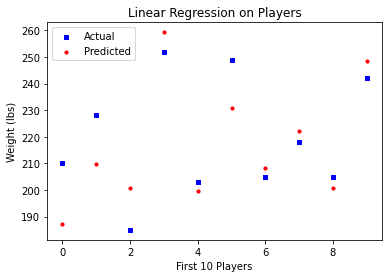

In [220]:
x = range(10)
fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.title('Linear Regression on Players')
plt.xlabel('First 10 Players')
plt.ylabel('Weight (lbs)')


ax1.scatter(x, players_test_labels_1[:10], s=10, c='b', marker="s", label='Actual')
ax1.scatter(x, preds_players_1[:10], s=10, c='r', marker="o", label='Predicted')
plt.legend(loc='upper left');
plt.show()

*******************************************************************************
*******************************************************************************
Predicting a Player's WEIGHT based on: HEIGHT, BIRTHDAY, and COLLEGE

Linear Regression
*******************************************************************************
*******************************************************************************

In [11]:
total_features_players_2 = pd.concat((players_train_1, players_test_1))
players_data_refined_2 = pd.concat([total_features_players_2.iloc[:, 1:2], total_features_players_2.iloc[:, 3:-2]], axis=1)
players_data_refined_2.head()

,height,birthDate,collegeName
1228,70,1996-02-02,Utah State
557,68,1990-11-27,Florida State
923,70,1992-02-23,Missouri
9,77,1990-11-10,Stanford
234,71,1995-04-10,Nevada-Las Vegas


In [12]:
# separate numeric from categorical data
all_features_players_2 = players_data_refined_2.select_dtypes(exclude='number')

# after standardizing the data all means vanish, hence we can set missing values to 0

all_features_players_2 = all_features_players_2.fillna(0)
all_features_players_2.head()

,height,birthDate,collegeName
1228,70,1996-02-02,Utah State
557,68,1990-11-27,Florida State
923,70,1992-02-23,Missouri
9,77,1990-11-10,Stanford
234,71,1995-04-10,Nevada-Las Vegas


In [13]:
# one hot encode all categorical data
all_features_players_2 = pd.get_dummies(all_features_players_2)
all_features_players_2.head()

,height_5-10,height_5-11,height_5-6,height_5-7,height_5-8,height_5-9,height_6-0,height_6-1,height_6-2,height_6-3,height_6-4,height_6-5,height_6-6,height_6-7,height_66,height_67,height_68,height_69,height_70,height_71,height_72,height_73,height_74,height_75,height_76,height_77,height_78,height_79,height_80,birthDate_01/02/1988,birthDate_01/03/1981,birthDate_01/03/1991,birthDate_01/04/1985,birthDate_01/06/1989,birthDate_01/07/1994,birthDate_01/08/1991,birthDate_01/10/1993,birthDate_01/13/1989,birthDate_01/14/1992,birthDate_01/15/1986,...,collegeName_Tiffin University,collegeName_Toledo,collegeName_Towson,collegeName_Troy,collegeName_Tulane,collegeName_Tulsa,collegeName_UCLA,collegeName_USC,collegeName_Utah,collegeName_Utah State,collegeName_Valdosta State,collegeName_Vanderbilt,collegeName_Villanova,collegeName_Virginia,collegeName_Virginia Commonwealth,collegeName_Virginia State,collegeName_Virginia Tech,collegeName_Wagner,collegeName_Wake Forest,collegeName_Washington,collegeName_Washington State,collegeName_Weber State,collegeName_West Alabama,collegeName_West Georgia,collegeName_West Virginia,collegeName_Western Carolina,collegeName_Western Kentucky,collegeName_Western Michigan,collegeName_Western Oregon,"collegeName_Western State, Colo.",collegeName_Western Washington,collegeName_William & Mary,collegeName_William Penn,collegeName_Wisconsin,collegeName_Wisconsin-Milwaukee,collegeName_Wisconsin-Platteville,collegeName_Wisconsin-Whitewater,collegeName_Wyoming,collegeName_Yale,collegeName_Youngstown State
1228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# recombine numeric and categorical data
n_train_players_2 = players_train_1.shape[0]
players_train_features_2 = all_features_players_2[:n_train_players_2].values
players_test_features_2 = all_features_players_2[n_train_players_2:].values
players_train_labels_2 = players_train_1.weight.values.reshape((-1, 1))
players_test_labels_2 = players_test_1.weight.values.reshape((-1, 1))

In [218]:
reg_players_2 = LinearRegression()
reg_players_2.fit(players_train_features_2, players_train_labels_2)
print("Stats for Predicting WEIGHT based on: HEIGHT, BIRTHDAY, COLLEGE")
print(f'Coefficient of Determination: {reg_players_2.score(players_train_features_2, players_train_labels_2)}')
print()
preds_players_2 = reg_players_2.predict(players_test_features_2)
print("FIRST 5")
for i in range(5):
  print(f'Actual Value: {players_test_labels_2[i][0]} -- {preds_players_2[i][0]} : Predicted Value')
print()
print(f'Mean Squared Error: {mean_squared_error(players_test_labels_2, preds_players_2)}')
print(f'Mean Absolute Error: {mean_absolute_error(players_test_labels_2, preds_players_2)}')

Stats for Predicting WEIGHT based on: HEIGHT, BIRTHDAY, COLLEGE
Coefficient of Determination: 1.0

FIRST 5
Actual Value: 210 -- 75.3011185876507 : Predicted Value
Actual Value: 228 -- 216.04950601654232 : Predicted Value
Actual Value: 185 -- 169.19936396089238 : Predicted Value
Actual Value: 252 -- 208.56646423337497 : Predicted Value
Actual Value: 203 -- 230.95711015356716 : Predicted Value

Mean Squared Error: 3002.4755730056963
Mean Absolute Error: 40.804779635211034


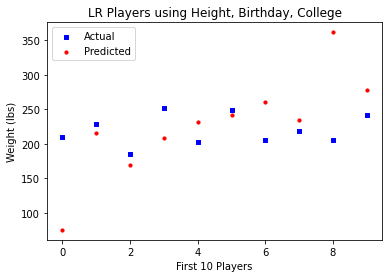

In [216]:
x2 = range(10)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

plt.title('LR Players using Height, Birthday, College')
plt.xlabel('First 10 Players')
plt.ylabel('Weight (lbs)')


ax2.scatter(x2, players_test_labels_2[:10], s=10, c='b', marker="s", label='Actual')
ax2.scatter(x2, preds_players_2[:10], s=10, c='r', marker="o", label='Predicted')
plt.legend(loc='upper left');
plt.show()

*******************************************************************************
*******************************************************************************
Predicting a Player's WEIGHT based on: HEIGHT, BIRTHDAY, COLLEGE, AND POSITION

Keras Network
*******************************************************************************
*******************************************************************************

In [240]:
total_features_players_3 = pd.concat((players_train_1, players_test_1))
players_data_refined_3 = pd.concat([total_features_players_3.iloc[:, 1:2], total_features_players_3.iloc[:, 3:-1]], axis=1)
players_data_refined_3.head()

,height,birthDate,collegeName,position
1228,70,1996-02-02,Utah State,CB
557,68,1990-11-27,Florida State,FS
923,70,1992-02-23,Missouri,CB
9,77,1990-11-10,Stanford,TE
234,71,1995-04-10,Nevada-Las Vegas,CB


In [241]:
# separate numeric from categorical data
all_features_players_3 = players_data_refined_3.select_dtypes(exclude='number')

# after standardizing the data all means vanish, hence we can set missing values to 0

all_features_players_3 = all_features_players_3.fillna(0)
all_features_players_3.head()

,height,birthDate,collegeName,position
1228,70,1996-02-02,Utah State,CB
557,68,1990-11-27,Florida State,FS
923,70,1992-02-23,Missouri,CB
9,77,1990-11-10,Stanford,TE
234,71,1995-04-10,Nevada-Las Vegas,CB


In [242]:
all_features_players_3 = pd.get_dummies(all_features_players_3)
all_features_players_3.head()

,height_5-10,height_5-11,height_5-6,height_5-7,height_5-8,height_5-9,height_6-0,height_6-1,height_6-2,height_6-3,height_6-4,height_6-5,height_6-6,height_6-7,height_66,height_67,height_68,height_69,height_70,height_71,height_72,height_73,height_74,height_75,height_76,height_77,height_78,height_79,height_80,birthDate_01/02/1988,birthDate_01/03/1981,birthDate_01/03/1991,birthDate_01/04/1985,birthDate_01/06/1989,birthDate_01/07/1994,birthDate_01/08/1991,birthDate_01/10/1993,birthDate_01/13/1989,birthDate_01/14/1992,birthDate_01/15/1986,...,collegeName_Weber State,collegeName_West Alabama,collegeName_West Georgia,collegeName_West Virginia,collegeName_Western Carolina,collegeName_Western Kentucky,collegeName_Western Michigan,collegeName_Western Oregon,"collegeName_Western State, Colo.",collegeName_Western Washington,collegeName_William & Mary,collegeName_William Penn,collegeName_Wisconsin,collegeName_Wisconsin-Milwaukee,collegeName_Wisconsin-Platteville,collegeName_Wisconsin-Whitewater,collegeName_Wyoming,collegeName_Yale,collegeName_Youngstown State,position_CB,position_DB,position_DE,position_DT,position_FB,position_FS,position_HB,position_ILB,position_K,position_LB,position_LS,position_MLB,position_NT,position_OLB,position_P,position_QB,position_RB,position_S,position_SS,position_TE,position_WR
1228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [243]:
# recombine numeric and categorical data
n_train_players_3 = players_train_1.shape[0]
players_train_features_3 = all_features_players_3[:n_train_players_3].values
players_test_features_3 = all_features_players_3[n_train_players_3:].values
players_train_labels_3 = players_train_1.weight.values.reshape((-1, 1))
players_test_labels_3 = players_test_1.weight.values.reshape((-1, 1))

In [244]:
from keras import models, layers
from keras.optimizers import SGD

learning_rate = 0.001
mom = 0.9

opt = SGD(lr=learning_rate, momentum=mom)

In [245]:
model_players = models.Sequential()

# print(players_train_features_3.shape[1])

model_players.add(layers.Dense(1028, activation='relu', input_shape=[players_train_features_3.shape[1]]))
model_players.add(layers.Dense(32, activation='relu'))

# output layer
model_players.add(layers.Dense(1)) 

In [246]:
model_players.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [247]:
history_players = model_players.fit(players_train_features_3, players_train_labels_3, validation_data=(players_test_features_3, players_test_labels_3), epochs=30)

Epoch 1/30
33/33 [==============================] - 1s 16ms/step - loss: 45779.7812 - mae: 211.7393 - val_loss: 37441.6328 - val_mae: 191.1554
Epoch 2/30
33/33 [==============================] - 0s 12ms/step - loss: 25952.6113 - mae: 156.1983 - val_loss: 13962.7490 - val_mae: 113.2303
Epoch 3/30
33/33 [==============================] - 0s 14ms/step - loss: 6070.2910 - mae: 65.5304 - val_loss: 1878.5527 - val_mae: 30.9866
Epoch 4/30
33/33 [==============================] - 0s 13ms/step - loss: 868.2971 - mae: 21.2008 - val_loss: 806.4177 - val_mae: 19.2018
Epoch 5/30
33/33 [==============================] - 0s 13ms/step - loss: 383.7383 - mae: 12.9831 - val_loss: 619.4427 - val_mae: 16.6889
Epoch 6/30
33/33 [==============================] - 0s 14ms/step - loss: 229.1305 - mae: 9.5338 - val_loss: 442.2201 - val_mae: 14.2964
Epoch 7/30
33/33 [==============================] - 0s 13ms/step - loss: 141.0969 - mae: 7.4114 - val_loss: 395.6929 - val_mae: 13.6679
Epoch 8/30
33/33 [===========

In [248]:
model_players.evaluate(players_test_features_3, players_test_labels_3)

9/9 [==============================] - 0s 3ms/step - loss: 316.1503 - mae: 13.6463


[316.1502685546875, 13.64626407623291]

In [221]:
# we get a sample data (the first 2 inputs from the training data)
to_predict = players_test_features_3[:20]
# we call the predict method
predictions = model_players.predict(to_predict)
print("FIRST 5")
for i in range(5):
  print(f'Actual Value: {players_test_labels_3[i][0]} -- {predictions[i][0]} : Predicted Value')
print()

FIRST 5
Actual Value: 210 -- 198.80154418945312 : Predicted Value
Actual Value: 228 -- 214.18551635742188 : Predicted Value
Actual Value: 185 -- 199.63363647460938 : Predicted Value
Actual Value: 252 -- 259.0893249511719 : Predicted Value
Actual Value: 203 -- 205.42930603027344 : Predicted Value



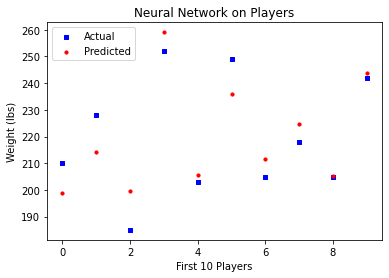

In [222]:
x = range(10)
fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.title('Neural Network on Players')
plt.xlabel('First 10 Players')
plt.ylabel('Weight (lbs)')


ax1.scatter(x, players_test_labels_3[:10], s=10, c='b', marker="s", label='Actual')
ax1.scatter(x, predictions[:10], s=10, c='r', marker="o", label='Predicted')
plt.legend(loc='upper left');
plt.show()

In [254]:
players_train_mseLoss = history_players.history['loss']
players_test_mseLoss = history_players.history['val_loss']
print(players_train_mseLoss)
print(players_test_mseLoss)

[45779.78125, 25952.611328125, 6070.291015625, 868.297119140625, 383.73834228515625, 229.13047790527344, 141.09690856933594, 92.88905334472656, 66.96092224121094, 54.065773010253906, 38.89299774169922, 31.363739013671875, 25.694568634033203, 22.40869903564453, 19.09042739868164, 19.575729370117188, 18.128246307373047, 15.78946590423584, 18.27762222290039, 15.528318405151367, 14.361015319824219, 17.47358512878418, 14.930852890014648, 15.385148048400879, 16.045795440673828, 14.211648941040039, 15.277819633483887, 14.902587890625, 14.821784019470215, 13.654512405395508]
[37441.6328125, 13962.7490234375, 1878.552734375, 806.417724609375, 619.4427490234375, 442.2200622558594, 395.69293212890625, 328.8829345703125, 430.8459777832031, 322.5560302734375, 412.7740478515625, 303.5445861816406, 324.6255187988281, 363.1974182128906, 322.4066162109375, 280.3398742675781, 280.6612548828125, 362.1732177734375, 283.9969787597656, 315.2790222167969, 308.2576599121094, 317.5567626953125, 293.34689331054

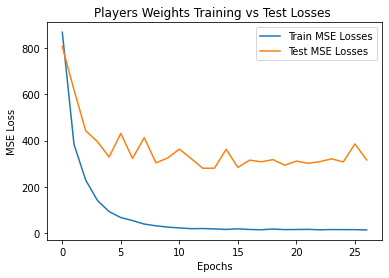

In [258]:
# line 1 points
x11 = range(27)
# plotting the line 1 points 
plt.plot(x11, players_train_mseLoss[3:], label = "Train MSE Losses")
# line 2 points
# plotting the line 2 points 
plt.plot(x11, players_test_mseLoss[3:], label = "Test MSE Losses")
plt.xlabel('Epochs')
# Set the y axis label of the current axis.
plt.ylabel('MSE Loss')
# Set a title of the current axes.
plt.title('Players Weights Training vs Test Losses ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

*******************************************************************************
*******************************************************************************
Predicting the Number of Yards Gained or Lost on a play based upon pre-play data

Linear Regression
*******************************************************************************
*******************************************************************************

Reading In Data

In [118]:
# read in data we need
plays_data = pd.read_csv('plays.csv')
plays_data = plays_data.loc[plays_data['penaltyCodes'].isnull()]
# plays_data = plays_data.loc[plays_data['passResult']=='C']
plays_data = plays_data.loc[plays_data['possessionTeam']=='ATL']
# split data into training and testing data
plays_train, plays_test = train_test_split(plays_data, test_size=0.2)

# Show split
print(f'All of plays data:   {plays_data.shape}')
print(f'Training plays data: {plays_train.shape}')
print(f'Test plays data: {plays_test.shape}')



All of plays data:   (642, 27)
Training plays data: (513, 27)
Test plays data: (129, 27)


Data Preprocessing

In [119]:
plays_data.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [120]:
total_features_plays = pd.concat((plays_train, plays_test))
# plays_data_refined = pd.concat([total_features.iloc[:, 3:-7], total_features.iloc[:, -2:]], axis=1)
plays_data_refined = total_features_plays.iloc[:, 3:-7]
plays_data_refined.head()


,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber
3885,2,3,4,ATL,play_type_pass,ATL,45,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,28.0,21.0,00:14:00,55.0
9519,2,1,10,ATL,play_type_pass,WAS,38,SINGLEBACK,"1 RB, 1 TE, 3 WR",6.0,5.0,"2 DL, 4 LB, 5 DB",SCRAMBLE_ROLLOUT_RIGHT,7.0,0.0,10:44:00,48.0
9520,2,3,4,ATL,play_type_pass,WAS,32,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,4.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,7.0,0.0,09:59:00,42.0
14766,2,2,12,ATL,play_type_pass,ATL,20,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,3.0,"2 DL, 3 LB, 6 DB",TRADITIONAL,7.0,7.0,14:11:00,30.0
6189,2,1,10,ATL,play_type_pass,ATL,25,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,13.0,21.0,00:26:00,85.0


In [121]:
# separate numeric from categorical data
str_features_plays = plays_data_refined.select_dtypes(exclude='number')
num_features_plays = plays_data_refined.select_dtypes(include='number')

columns = num_features_plays.columns
rows = num_features_plays.index

# standardize numeric data to mean=0 and variance=1
num_features_plays_scaled = preprocessing.scale(num_features_plays)
num_features_plays_scaled = pd.DataFrame(num_features_plays_scaled, rows, columns)

# after standardizing the data all means vanish, hence we can set missing values to 0
num_features_plays_scaled = num_features_plays_scaled.fillna(0)
str_features_plays = str_features_plays.fillna(0)

num_features_plays_scaled.head()

,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber
3885,-0.490099,1.277662,-1.203428,1.191674,-0.106128,-0.286404,2.105836,0.563389,-0.207386
9519,-0.490099,-0.991381,0.251108,0.639686,-0.106128,0.862791,-0.341005,-1.287667,-0.501582
9520,-0.490099,1.277662,-1.203428,0.166554,-0.106128,-0.286404,-0.341005,-1.287667,-0.753750
14766,-0.490099,0.143141,0.735953,-0.779710,-0.106128,-1.435599,-0.341005,-0.670648,-1.258085
6189,-0.490099,-0.991381,0.251108,-0.385433,-1.065760,-0.286404,0.358092,0.563389,1.053453


In [122]:
# recombine numeric and categorical data
# one hot encode all categorical data
all_features_plays = pd.concat([num_features_plays_scaled, str_features_plays], axis=1)
all_features_plays = pd.get_dummies(all_features_plays)
all_features_plays.head()

,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,possessionTeam_ATL,playType_play_type_pass,playType_play_type_sack,yardlineSide_0,yardlineSide_ARI,yardlineSide_ATL,yardlineSide_BAL,yardlineSide_CAR,yardlineSide_CIN,yardlineSide_CLE,yardlineSide_DAL,yardlineSide_GB,yardlineSide_NO,yardlineSide_NYG,yardlineSide_PHI,yardlineSide_PIT,yardlineSide_TB,yardlineSide_WAS,offenseFormation_0,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,"personnelO_0 RB, 1 TE, 4 WR","personnelO_0 RB, 2 TE, 3 WR","personnelO_1 RB, 0 TE, 4 WR","personnelO_1 RB, 1 TE, 3 WR","personnelO_1 RB, 2 TE, 2 WR","personnelO_1 RB, 3 TE, 1 WR","personnelO_2 RB, 0 TE, 3 WR",...,gameClock_13:29:00,gameClock_13:35:00,gameClock_13:38:00,gameClock_13:39:00,gameClock_13:40:00,gameClock_13:44:00,gameClock_13:45:00,gameClock_13:46:00,gameClock_13:49:00,gameClock_13:50:00,gameClock_13:51:00,gameClock_13:53:00,gameClock_13:54:00,gameClock_13:56:00,gameClock_13:57:00,gameClock_14:04:00,gameClock_14:05:00,gameClock_14:07:00,gameClock_14:09:00,gameClock_14:11:00,gameClock_14:15:00,gameClock_14:17:00,gameClock_14:18:00,gameClock_14:19:00,gameClock_14:20:00,gameClock_14:21:00,gameClock_14:22:00,gameClock_14:23:00,gameClock_14:24:00,gameClock_14:31:00,gameClock_14:48:00,gameClock_14:49:00,gameClock_14:50:00,gameClock_14:52:00,gameClock_14:53:00,gameClock_14:54:00,gameClock_14:55:00,gameClock_14:56:00,gameClock_14:57:00,gameClock_15:00:00
3885,-0.490099,1.277662,-1.203428,1.191674,-0.106128,-0.286404,2.105836,0.563389,-0.207386,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9519,-0.490099,-0.991381,0.251108,0.639686,-0.106128,0.862791,-0.341005,-1.287667,-0.501582,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9520,-0.490099,1.277662,-1.203428,0.166554,-0.106128,-0.286404,-0.341005,-1.287667,-0.753750,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14766,-0.490099,0.143141,0.735953,-0.779710,-0.106128,-1.435599,-0.341005,-0.670648,-1.258085,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6189,-0.490099,-0.991381,0.251108,-0.385433,-1.065760,-0.286404,0.358092,0.563389,1.053453,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
n_train_plays = plays_train.shape[0]
plays_train_features = all_features_plays[:n_train_plays].values
plays_test_features = all_features_plays[n_train_plays:].values
plays_train_labels = plays_train.playResult.values.reshape((-1, 1))
plays_test_labels = plays_test.playResult.values.reshape((-1, 1))

Training

In [223]:
reg_plays = LinearRegression()
reg_plays.fit(plays_train_features, plays_train_labels)
print(f'Coefficient of Determination: {reg_plays.score(plays_train_features, plays_train_labels)}')
print()
preds_plays = reg_plays.predict(plays_test_features)
print("FIRST 5")
for i in range(5):
  print(f'Actual Value: {plays_test_labels[i][0]} -- {preds_plays[i][0]} : Predicted Value')
print()
print(f'Mean Squared Error: {mean_squared_error(plays_test_labels, preds_plays)}')
print(f'Mean Absolute Error: {mean_absolute_error(plays_test_labels, preds_plays)}')

Coefficient of Determination: 0.9328658043818536

FIRST 5
Actual Value: 9 -- -27144729211676.445 : Predicted Value
Actual Value: 15 -- 5.6640625 : Predicted Value
Actual Value: 18 -- 5.7421875 : Predicted Value
Actual Value: 3 -- -27144729211684.664 : Predicted Value
Actual Value: 15 -- 40108119698642.11 : Predicted Value

Mean Squared Error: 6.453900072395466e+27
Mean Absolute Error: 30396248902476.74


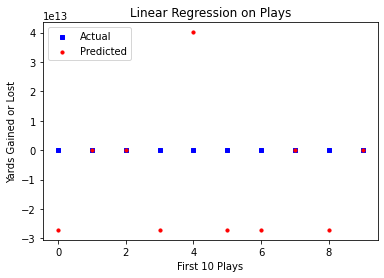

In [226]:
x = range(10)
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)

plt.title('Linear Regression on Plays')
plt.xlabel('First 10 Plays')
plt.ylabel('Yards Gained or Lost')


ax3.scatter(x, plays_test_labels[:10], s=10, c='b', marker="s", label='Actual')
ax3.scatter(x, preds_plays[:10], s=10, c='r', marker="o", label='Predicted')
plt.legend(loc='upper left');
plt.show()

*******************************************************************************
*******************************************************************************
Predicting the Number of Yards Gained or Lost on a play based upon pre-play data

Custom Neural Network
*******************************************************************************
*******************************************************************************

In [135]:
total_features_plays_2 = pd.concat((plays_train, plays_test))
# plays_data_refined = pd.concat([total_features.iloc[:, 3:-7], total_features.iloc[:, -2:]], axis=1)
plays_data_refined_2 = total_features_plays_2.iloc[:, 3:-7]
plays_data_refined_2.head()

,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber
3885,2,3,4,ATL,play_type_pass,ATL,45,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,28.0,21.0,00:14:00,55.0
9519,2,1,10,ATL,play_type_pass,WAS,38,SINGLEBACK,"1 RB, 1 TE, 3 WR",6.0,5.0,"2 DL, 4 LB, 5 DB",SCRAMBLE_ROLLOUT_RIGHT,7.0,0.0,10:44:00,48.0
9520,2,3,4,ATL,play_type_pass,WAS,32,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,4.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,7.0,0.0,09:59:00,42.0
14766,2,2,12,ATL,play_type_pass,ATL,20,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,3.0,"2 DL, 3 LB, 6 DB",TRADITIONAL,7.0,7.0,14:11:00,30.0
6189,2,1,10,ATL,play_type_pass,ATL,25,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,13.0,21.0,00:26:00,85.0


In [136]:
# separate numeric from categorical data
str_features_plays_2 = plays_data_refined_2.select_dtypes(exclude='number')
num_features_plays_2 = plays_data_refined_2.select_dtypes(include='number')

columns_2 = num_features_plays_2.columns
rows_2 = num_features_plays_2.index

# standardize numeric data to mean=0 and variance=1
num_features_plays_scaled_2 = preprocessing.scale(num_features_plays_2)
num_features_plays_scaled_2 = pd.DataFrame(num_features_plays_scaled_2, rows_2, columns_2)

# after standardizing the data all means vanish, hence we can set missing values to 0
num_features_plays_scaled_2 = num_features_plays_scaled_2.fillna(0)
str_features_plays_2 = str_features_plays_2.fillna(0)

num_features_plays_scaled_2.head()

,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber
3885,-0.490099,1.277662,-1.203428,1.191674,-0.106128,-0.286404,2.105836,0.563389,-0.207386
9519,-0.490099,-0.991381,0.251108,0.639686,-0.106128,0.862791,-0.341005,-1.287667,-0.501582
9520,-0.490099,1.277662,-1.203428,0.166554,-0.106128,-0.286404,-0.341005,-1.287667,-0.753750
14766,-0.490099,0.143141,0.735953,-0.779710,-0.106128,-1.435599,-0.341005,-0.670648,-1.258085
6189,-0.490099,-0.991381,0.251108,-0.385433,-1.065760,-0.286404,0.358092,0.563389,1.053453


In [137]:
# recombine numeric and categorical data
# one hot encode all categorical data
all_features_plays_2 = pd.concat([num_features_plays_scaled_2, str_features_plays_2], axis=1)
all_features_plays_2 = pd.get_dummies(all_features_plays_2)
all_features_plays_2.head()

,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,possessionTeam_ATL,playType_play_type_pass,playType_play_type_sack,yardlineSide_0,yardlineSide_ARI,yardlineSide_ATL,yardlineSide_BAL,yardlineSide_CAR,yardlineSide_CIN,yardlineSide_CLE,yardlineSide_DAL,yardlineSide_GB,yardlineSide_NO,yardlineSide_NYG,yardlineSide_PHI,yardlineSide_PIT,yardlineSide_TB,yardlineSide_WAS,offenseFormation_0,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,"personnelO_0 RB, 1 TE, 4 WR","personnelO_0 RB, 2 TE, 3 WR","personnelO_1 RB, 0 TE, 4 WR","personnelO_1 RB, 1 TE, 3 WR","personnelO_1 RB, 2 TE, 2 WR","personnelO_1 RB, 3 TE, 1 WR","personnelO_2 RB, 0 TE, 3 WR",...,gameClock_13:29:00,gameClock_13:35:00,gameClock_13:38:00,gameClock_13:39:00,gameClock_13:40:00,gameClock_13:44:00,gameClock_13:45:00,gameClock_13:46:00,gameClock_13:49:00,gameClock_13:50:00,gameClock_13:51:00,gameClock_13:53:00,gameClock_13:54:00,gameClock_13:56:00,gameClock_13:57:00,gameClock_14:04:00,gameClock_14:05:00,gameClock_14:07:00,gameClock_14:09:00,gameClock_14:11:00,gameClock_14:15:00,gameClock_14:17:00,gameClock_14:18:00,gameClock_14:19:00,gameClock_14:20:00,gameClock_14:21:00,gameClock_14:22:00,gameClock_14:23:00,gameClock_14:24:00,gameClock_14:31:00,gameClock_14:48:00,gameClock_14:49:00,gameClock_14:50:00,gameClock_14:52:00,gameClock_14:53:00,gameClock_14:54:00,gameClock_14:55:00,gameClock_14:56:00,gameClock_14:57:00,gameClock_15:00:00
3885,-0.490099,1.277662,-1.203428,1.191674,-0.106128,-0.286404,2.105836,0.563389,-0.207386,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9519,-0.490099,-0.991381,0.251108,0.639686,-0.106128,0.862791,-0.341005,-1.287667,-0.501582,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9520,-0.490099,1.277662,-1.203428,0.166554,-0.106128,-0.286404,-0.341005,-1.287667,-0.753750,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14766,-0.490099,0.143141,0.735953,-0.779710,-0.106128,-1.435599,-0.341005,-0.670648,-1.258085,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6189,-0.490099,-0.991381,0.251108,-0.385433,-1.065760,-0.286404,0.358092,0.563389,1.053453,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [138]:
n_train_plays_2 = plays_train.shape[0]
plays_train_features_2 = all_features_plays_2[:n_train_plays_2].values
plays_test_features_2 = all_features_plays_2[n_train_plays_2:].values
plays_train_labels_2 = plays_train.playResult.values.reshape((-1, 1))
plays_test_labels_2 = plays_test.playResult.values.reshape((-1, 1))

In [158]:
model_plays = models.Sequential()

# print(players_train_features_3.shape[1])

model_plays.add(layers.Dense(256, activation='relu', input_shape=[plays_train_features_2.shape[1]]))
model_plays.add(layers.Dense(32, activation='relu'))

# output layer
model_plays.add(layers.Dense(1)) 

In [159]:
model_plays.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [160]:
history_plays = model_plays.fit(plays_train_features_2, plays_train_labels_2, validation_data=(plays_test_features_2, plays_test_labels_2), epochs=15)

Epoch 1/15
17/17 [==============================] - 0s 9ms/step - loss: 131.1550 - mae: 7.7141 - val_loss: 145.9859 - val_mae: 7.4844
Epoch 2/15
17/17 [==============================] - 0s 4ms/step - loss: 101.4728 - mae: 7.1549 - val_loss: 130.2256 - val_mae: 7.4533
Epoch 3/15
17/17 [==============================] - 0s 4ms/step - loss: 93.3877 - mae: 6.9748 - val_loss: 129.7636 - val_mae: 7.4506
Epoch 4/15
17/17 [==============================] - 0s 3ms/step - loss: 89.3658 - mae: 6.8168 - val_loss: 130.4610 - val_mae: 7.8718
Epoch 5/15
17/17 [==============================] - 0s 3ms/step - loss: 85.2974 - mae: 6.7952 - val_loss: 133.6409 - val_mae: 7.4260
Epoch 6/15
17/17 [==============================] - 0s 4ms/step - loss: 82.9415 - mae: 6.4129 - val_loss: 134.1703 - val_mae: 7.4703
Epoch 7/15
17/17 [==============================] - 0s 4ms/step - loss: 79.2792 - mae: 6.2361 - val_loss: 131.8716 - val_mae: 7.8367
Epoch 8/15
17/17 [==============================] - 0s 3ms/step - l

In [146]:
model_plays.evaluate(plays_test_features_2, plays_test_labels_2)

5/5 [==============================] - 0s 2ms/step - loss: 160.1664 - mae: 9.0505


[160.16644287109375, 9.050479888916016]

In [227]:
# we get a sample data (the first 2 inputs from the training data)
predict_plays = plays_test_features_2[:20]
# we call the predict method
predictions_plays = model_plays.predict(predict_plays)
print("FIRST 5")
for i in range(5):
  print(f'Actual Value: {plays_test_labels_2[i][0]} -- {predictions_plays[i][0]} : Predicted Value')
print()

FIRST 5
Actual Value: 9 -- 19.180391311645508 : Predicted Value
Actual Value: 15 -- 6.5989885330200195 : Predicted Value
Actual Value: 18 -- 13.478283882141113 : Predicted Value
Actual Value: 3 -- 10.147772789001465 : Predicted Value
Actual Value: 15 -- 13.572209358215332 : Predicted Value



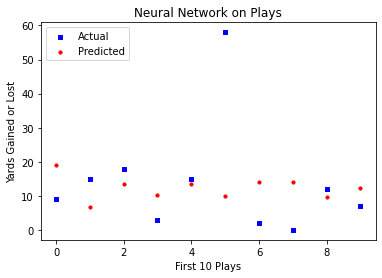

In [228]:
x = range(10)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)

plt.title('Neural Network on Plays')
plt.xlabel('First 10 Plays')
plt.ylabel('Yards Gained or Lost')


ax4.scatter(x, plays_test_labels[:10], s=10, c='b', marker="s", label='Actual')
ax4.scatter(x, predictions_plays[:10], s=10, c='r', marker="o", label='Predicted')
plt.legend(loc='upper left');
plt.show()